In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
# Loading the data

X, y = fetch_california_housing(return_X_y=True)

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

cal_data = download_read_data(data_path)
#cal_data.head()

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()
correlation = train_data.corr()
correlation['median_house_value']


The size of training data is: 18576 
The size of testing data is: 2064


/tmp/ipykernel_6242/3555062854.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

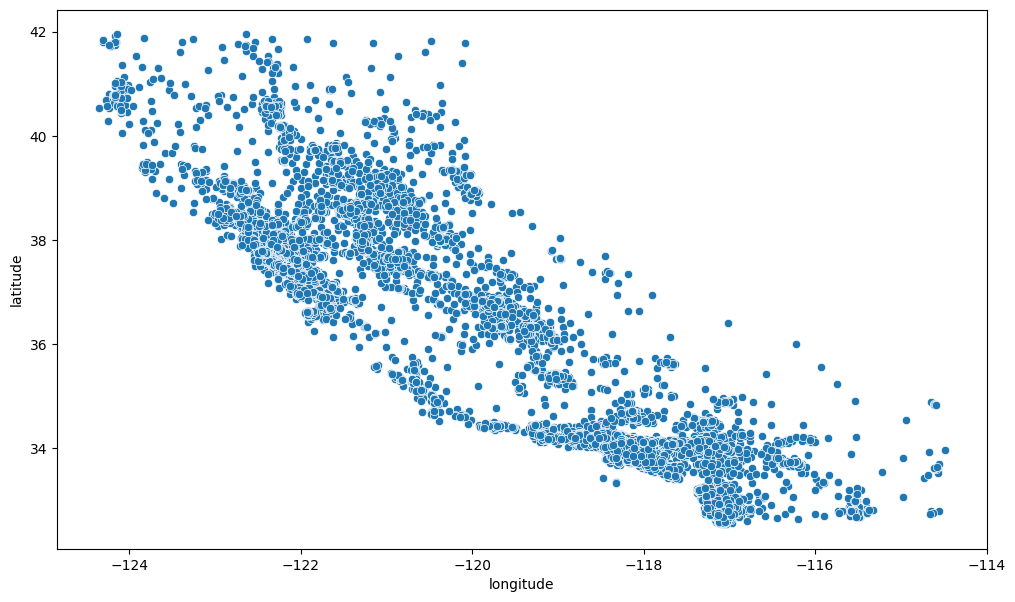

In [3]:
#https://commons.wikimedia.org/wiki/File:Geologic_map_California.jpg#/media/File:Geologic_map_California.jpg
#Since we have latitude and longitude, let's plot it. It can help us to know the location of certain houses on the map and hopefully this will resemble California map.
plt.figure(figsize=(12,7))
sns.scatterplot(data=train_data, x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

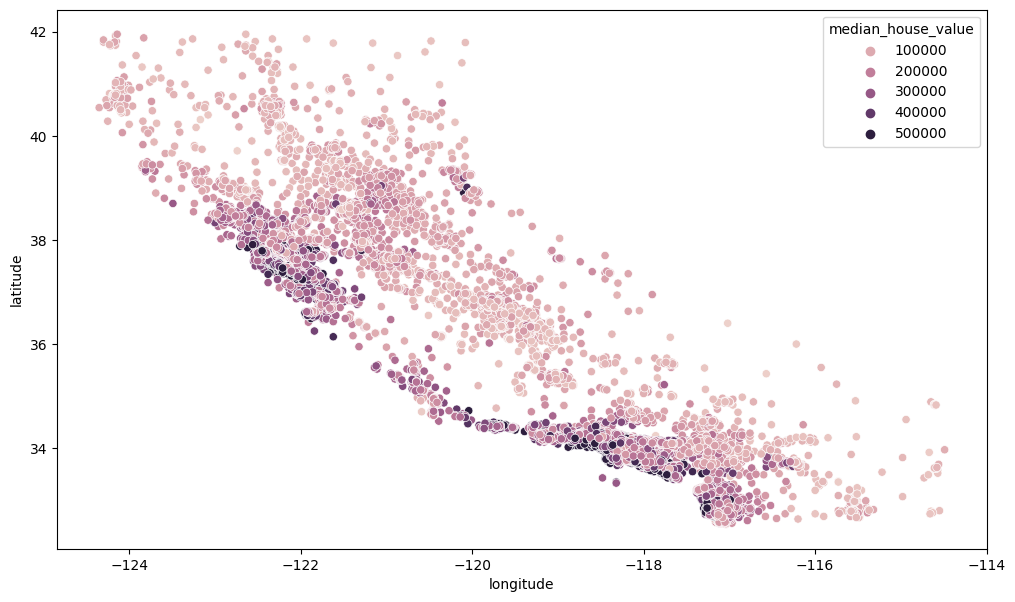

In [4]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=train_data, x='longitude', y='latitude',hue='median_house_value')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

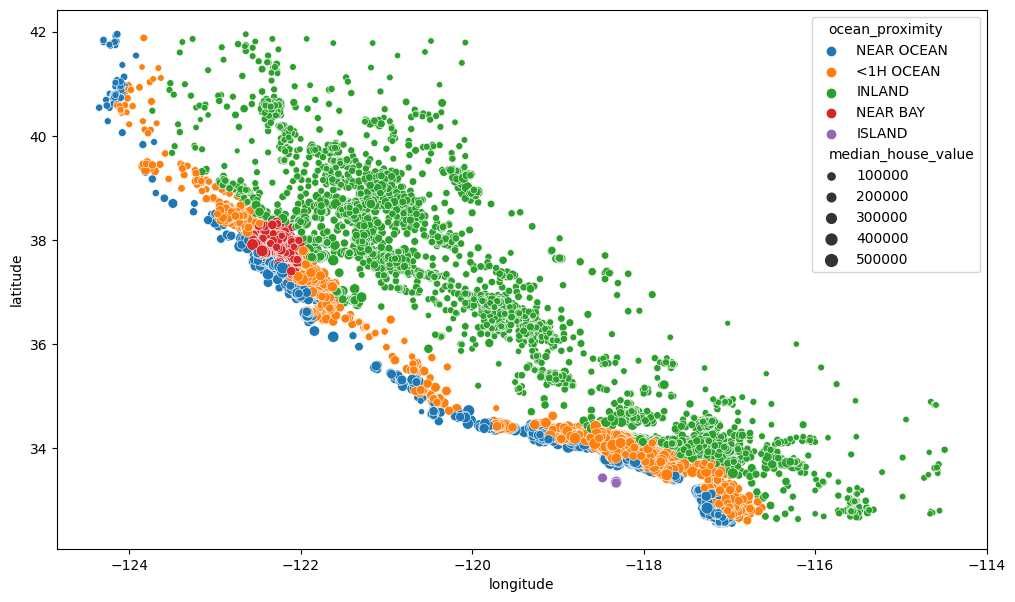

In [5]:
#It makes sense that the most expensive houses are those close to sea. We can verify that with the ocean_proximity
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

In [ ]:
# all houses near the ocean are very expensive compared to other areas